In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./dataset/liar_dataset/train.tsv",sep="\t")
# test = pd.read_csv("./dataset/liar_dataset/test.tsv",sep="\t")

In [3]:
print(data.columns)
#()
data.head()

Index(['ID of the statement', 'label', 'statement', 'subject', 'speaker',
       'job title speaker', 'state', 'party affiliatio', 'barely true counts',
       'false counts', 'half true counts', 'mostly true counts',
       'pants on fire counts', 'context'],
      dtype='object')


,ID of the statement,label,statement,subject,speaker,job title speaker,state,party affiliatio,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,context
0,2635.json,FALSE,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [4]:
data=data[["statement","label"]]

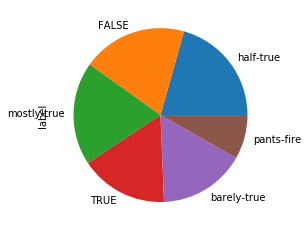

In [6]:
data.label.unique()
pd.value_counts(data['label']).plot.pie()

In [ ]:
# test.describe()

In [7]:
def encode_label(label):
   
    if label == "true" or label == "mostly-true" or label=="half-true":
        return 1
    else:
        return 0
#     else:
#         return None

In [8]:
data["label_numeric"] = data["label"].apply(encode_label)

In [9]:
data.label_numeric.unique()

array([0, 1])

In [10]:
data.label_numeric

0        0
1        1
2        1
3        0
4        1
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       1
14       0
15       1
16       0
17       0
18       1
19       1
20       0
21       1
22       1
23       1
24       0
25       0
26       1
27       1
28       0
29       1
        ..
10210    0
10211    0
10212    1
10213    0
10214    0
10215    0
10216    0
10217    1
10218    0
10219    1
10220    1
10221    0
10222    0
10223    1
10224    0
10225    1
10226    1
10227    0
10228    0
10229    1
10230    0
10231    1
10232    1
10233    0
10234    1
10235    1
10236    1
10237    1
10238    0
10239    0
Name: label_numeric, Length: 10240, dtype: int64

In [11]:
data = data[['statement', 'label_numeric']].dropna()

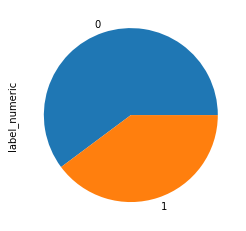

In [12]:
pd.value_counts(data['label_numeric']).plot.pie()

In [13]:
data.head()

,statement,label_numeric
0,Says the Annies List political group supports ...,0
1,When did the decline of coal start? It started...,1
2,"Hillary Clinton agrees with John McCain ""by vo...",1
3,Health care reform legislation is likely to ma...,0
4,The economic turnaround started at the end of ...,1


In [14]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm

train test split

In [15]:
# create training and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['statement'],
                                                    data['label_numeric'],
                                                    test_size=0.2, 
                                                    random_state=2019)

In [16]:
naive_pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                ('model', MultinomialNB())])
naive_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
logistic_pipe = Pipeline([('vectorizer', TfidfVectorizer()),('model', LogisticRegression())])
logistic_pipe.fit(X=X_train,y=y_train)

/home/groot/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [18]:
rf_pipe = Pipeline([('vectorizer', TfidfVectorizer()),
                ('model', RandomForestClassifier(n_estimators=100))])
rf_pipe.fit(X=X_train, y=y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [ ]:
# false_statements = np.random.choice(X_test[y_test==0], size=5)
# false_statements

In [ ]:
# tfidf_pipe.predict_proba(false_statements)

In [ ]:
# rf_pipe.predict_proba(false_statements)



In [ ]:
# true_statements = np.random.choice(X_test[y_test==1], size=5)
            

In [ ]:
# tfidf_pipe.predict_proba(true_statements)


In [19]:
rf_pipe.predict_proba(np.array(["Earth is flat"]))

array([[0.86, 0.14]])

In [20]:
y_pred_RF= rf_pipe.predict_proba(X_test)
logistic_pred = logistic_pipe.predict_proba(X_test)
nb_pred= naive_pipe.predict_proba(X_test)

In [ ]:
# print(y_test.head())

In [28]:
# nb_pred=[round(max(x)) for x in nb_pred]
# y_pred_RF=[round(max(x)) for x in y_pred_RF]
logistic_pred=[round(max(x)) for x in logistic_pred]


In [23]:
y_test=y_test.tolist()
# y_test=round(y_test)

In [31]:
print("True_Label     NB_results \t RF_results \t  logistic_pred")
for i in range(2048):
    print("{} \t\t {} \t\t {} \t\t {}".format(y_test[i],nb_pred[i],y_pred_RF[i],logistic_pred[i]))

True_Label     NB_results 	 RF_results 	  logistic_pred
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
1 		 1.0 		 0.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1 		 1.0 		 1.0 		 1.0
0 		 1.0 		 1.0 		 1.0
1

In [67]:
# dir(rf_pipe)
# rf_pipe.classes_

In [56]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report
target_names=["true","false"]
confusion_matrix(y_test, nb_pred)

array([[   0, 1254],
       [   0,  794]])

In [71]:
rf=classification_report(y_test, y_pred_RF)
lr=classification_report(y_test, logistic_pred)
nb=classification_report(y_test, nb_pred)
print("Naive Bayes:\n\n",nb)
print("Random Forest:\n\n",rf)
print("Logistic regression:\n\n",lr)

Naive Bayes:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1254
           1       0.39      1.00      0.56       794

    accuracy                           0.39      2048
   macro avg       0.19      0.50      0.28      2048
weighted avg       0.15      0.39      0.22      2048

Random Forest:

               precision    recall  f1-score   support

           0       0.53      0.01      0.03      1254
           1       0.39      0.98      0.55       794

    accuracy                           0.39      2048
   macro avg       0.46      0.50      0.29      2048
weighted avg       0.48      0.39      0.23      2048

Logistic regression:

               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1254
           1       0.39      1.00      0.56       794

    accuracy                           0.39      2048
   macro avg       0.19      0.50      0.28      2048
weighted avg       

In [49]:
accuracy_score(y_test, logistic_pred)

0.3876953125